In [0]:
# Utill fns for bigquery
from os import path

from google.cloud import bigquery
from google.oauth2 import service_account
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import preprocessing
#from scipy.stats import shapiro
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from google.cloud import bigquery
from google.oauth2 import service_account
import sys
from os import path

In [0]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [0]:
c = []
while(1):
    c.append(‘1’)

In [0]:
project_id = 'nimble-valve-257105'

In [0]:
start_date='2020-02-13'
end_date='2020-02-23'

In [0]:
start_date='2020-01-01'
end_date='2020-01-07'

In [0]:
start_date='2019-12-25'
end_date='2019-12-31'

In [0]:
def gbq_query(query, query_params=None):
    """
    Run a query against Google Big Query, returning a pandas dataframe of the result.

    Parameters
    ----------
    query: str
        The query string
    cred: obj
        Credential class instance
    
    query_params: list, optional
        The query parameters to pass into the query string
    """
    client = bigquery.Client(project=project_id)
    job_config = bigquery.QueryJobConfig()
    job_config.query_parameters = query_params
    return client.query(query, job_config=job_config).to_dataframe()

In [0]:
#Query and query_parameters
query1 = """
Select 
  TIMESTAMP(l.CloseTime) as `TimeStamp`,
  t.Account,t.Destination,t.Fee,t.TxnSignature,t.AmountXRP,t.LedgerIndex,t.TransactionType, TransactionResult, t.AmountDEX
FROM
  `xrpledgerdata.fullhistory.transactions`t
JOIN
  `xrpledgerdata.fullhistory.ledgers` l
  on t.LedgerIndex=l.LedgerIndex
where t.TransactionResult = "tesSUCCESS"

AND TIMESTAMP(l.CloseTime) >=TIMESTAMP(@start_date)
AND TIMESTAMP(l.CloseTime) <=TIMESTAMP(@end_date)




LIMIT 10000000000

"""
#, TakerGetsDEX, Memos, TakerPaysXRP, TakerGetsXRP

In [0]:
query2 = """
Select*
FROM
  `xrpledgerdata.fullhistory.transactions`t

LIMIT 10000

"""

In [0]:
query_params1 = [
    bigquery.ScalarQueryParameter("start_date", "STRING", start_date),
    bigquery.ScalarQueryParameter("end_date", "STRING", end_date)
]

In [0]:
import timeit

start = timeit.default_timer()

a = gbq_query(query1, query_params1)

stop = timeit.default_timer()

print('Time: ', stop - start)  

Time:  972.0972780540001


In [0]:
a

,TimeStamp,Account,Destination,Fee,TxnSignature,AmountXRP,LedgerIndex,TransactionType,TransactionResult,AmountDEX
0,2020-02-18 13:19:11+00:00,r4dgY6Mzob3NVq8CFYdEiPnXKboRScsXRu,None,12,30450221009A02904DA6EBEF67814A60D5AE44B08E8B51...,NaN,53518928,OfferCreate,tesSUCCESS,None
1,2020-02-18 13:59:01+00:00,r4dgY6Mzob3NVq8CFYdEiPnXKboRScsXRu,None,12,30440220580BF72F1CEDE12C6ADF7FFF9AC1E2818F59F0...,NaN,53519557,OfferCreate,tesSUCCESS,None
2,2020-02-18 13:26:20+00:00,r4dgY6Mzob3NVq8CFYdEiPnXKboRScsXRu,None,12,3045022100D9B3E37A2452F554F08D9C63D5939797FC10...,NaN,53519039,OfferCreate,tesSUCCESS,None
3,2020-02-18 13:11:10+00:00,r4dgY6Mzob3NVq8CFYdEiPnXKboRScsXRu,None,12,304402200116FF79F37FB4C4F4A1EF9021FA330F32D47B...,NaN,53518799,OfferCreate,tesSUCCESS,None
4,2020-02-18 13:08:41+00:00,r4dgY6Mzob3NVq8CFYdEiPnXKboRScsXRu,None,12,3045022100D13FB37709AFE0DAAEAD368DD0D2CA134166...,NaN,53518761,OfferCreate,tesSUCCESS,None
...,...,...,...,...,...,...,...,...,...,...
7583907,2020-02-18 14:11:42+00:00,r4dgY6Mzob3NVq8CFYdEiPnXKboRScsXRu,None,12,3045022100EB3CAC58192DCC5B781936F87515A9E3B668...,NaN,53519758,OfferCreate,tesSUCCESS,None
7583908,2020-02-18 13:37:32+00:00,r4dgY6Mzob3NVq8CFYdEiPnXKboRScsXRu,None,12,30440220598E62F69A375AEBE32F4E9717CC643B92F96F...,NaN,53519216,OfferCreate,tesSUCCESS,None
7583909,2020-02-18 13:56:42+00:00,r4dgY6Mzob3NVq8CFYdEiPnXKboRScsXRu,None,12,3044022061DBE605A85CE552608220D62C16F0B15D3ABD...,NaN,53519521,OfferCreate,tesSUCCESS,None
7583910,2020-02-18 14:07:20+00:00,r4dgY6Mzob3NVq8CFYdEiPnXKboRScsXRu,None,12,304402204C2D76BABBA62F54CEBF62516D82C567FE9955...,NaN,53519687,OfferCreate,tesSUCCESS,None


In [0]:
percentiles = [.25, .5, .75, .90, .95, .98, .999, .9999]
a.describe(percentiles=percentiles)

,Fee,AmountXRP,LedgerIndex
count,7.583912e+06,8.337380e+05,7.583912e+06
mean,1.016471e+03,2.047426e+10,5.350424e+07
std,1.983109e+05,1.095401e+13,6.559856e+04
min,1.000000e+01,1.000000e+00,5.339186e+07
25%,1.200000e+01,1.890000e+02,5.344610e+07
50%,1.200000e+01,2.790000e+02,5.350552e+07
75%,1.200000e+01,9.834062e+07,5.355746e+07
90%,1.200000e+01,3.000000e+09,5.359662e+07
95%,1.500000e+02,1.600521e+10,5.360943e+07
98%,1.000000e+03,6.990000e+10,5.361669e+07


In [0]:
a.groupby(['LedgerIndex']).mean().describe(percentiles)

,Fee,AmountXRP
count,2.296590e+05,1.826130e+05
mean,9.932240e+02,4.175882e+10
std,3.565943e+04,1.170173e+13
min,1.000000e+01,1.000000e+00
25%,1.200000e+01,1.000510e+07
50%,2.482759e+01,3.000000e+08
75%,1.740625e+02,3.233885e+09
90%,2.728654e+03,2.001910e+10
95%,5.895800e+03,5.004255e+10
98%,9.102172e+03,1.176094e+11


In [0]:
a

,TimeStamp,Account,Destination,Fee,TxnSignature,AmountXRP,LedgerIndex,TransactionType,TransactionResult,AmountDEX,TakerGetsDEX,Memos,TakerPaysXRP,TakerGetsXRP
0,2020-01-18 22:26:50+00:00,rQ3fNyLjbvcDaPNS4EAJY8aT9zR3uGk17c,None,12,3045022100D9F1E04F314611C206E74DA34A132E8CBE0D...,NaN,52830370,OfferCreate,tesSUCCESS,None,None,[],NaN,4.165440e+09
1,2020-01-18 22:02:20+00:00,rQ3fNyLjbvcDaPNS4EAJY8aT9zR3uGk17c,None,12,304402200B5FEEC1FE9ABE3746D7A47D0FBA7B83C7F617...,NaN,52829998,OfferCreate,tesSUCCESS,None,None,[],NaN,5.119918e+09
2,2020-01-18 22:43:52+00:00,rQ3fNyLjbvcDaPNS4EAJY8aT9zR3uGk17c,None,12,3045022100EC701115CCCF2B6FC6ACEB7233D726B05D5C...,NaN,52830631,OfferCreate,tesSUCCESS,None,None,[],NaN,1.520562e+10
3,2020-01-18 22:38:50+00:00,rQ3fNyLjbvcDaPNS4EAJY8aT9zR3uGk17c,None,12,304402201CE8BD1514A50C4BA9A5FCF59A8E506D317D6D...,NaN,52830553,OfferCreate,tesSUCCESS,None,None,[],NaN,6.861164e+09
4,2020-01-18 22:21:50+00:00,rQ3fNyLjbvcDaPNS4EAJY8aT9zR3uGk17c,None,12,304402203E86C7244A0A682909292606A0D44FDD232AE9...,NaN,52830293,OfferCreate,tesSUCCESS,None,None,[],NaN,5.642869e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4565203,2020-01-18 22:18:30+00:00,rQ3fNyLjbvcDaPNS4EAJY8aT9zR3uGk17c,None,12,30450221008AF2718611A5B93ACB3B91143C57497FDDD6...,None,52830242,OfferCreate,tesSUCCESS,None,None,[],None,1.642857e+10
4565204,2020-01-18 23:05:41+00:00,rQ3fNyLjbvcDaPNS4EAJY8aT9zR3uGk17c,None,12,3044022061B40DA66B2D1D91CCCB21D2AB06BEE910CB06...,None,52830964,OfferCreate,tesSUCCESS,None,None,[],None,1.716231e+10
4565205,2020-01-18 22:23:50+00:00,rQ3fNyLjbvcDaPNS4EAJY8aT9zR3uGk17c,None,12,3045022100EC7CBBB65F61B7E653F945629016AA6EBA01...,None,52830324,OfferCreate,tesSUCCESS,None,None,[],None,1.257856e+10
4565206,2020-01-18 22:07:01+00:00,rQ3fNyLjbvcDaPNS4EAJY8aT9zR3uGk17c,None,12,3045022100B2E1F1F28374C5BE332C559FFA51FABFEABC...,None,52830070,OfferCreate,tesSUCCESS,None,None,[],None,1.613278e+10


In [0]:
a.describe()

,Fee,LedgerIndex,TakerGetsXRP
count,4.565208e+06,4.565208e+06,2.126824e+06
mean,1.204814e+03,5.280899e+07,8.948032e+09
std,2.249290e+04,3.864611e+04,8.577749e+09
min,1.000000e+01,5.274312e+07,2.000000e+00
25%,1.200000e+01,5.277519e+07,2.339553e+09
50%,1.200000e+01,5.280918e+07,7.859558e+09
75%,1.200000e+01,5.284191e+07,1.447793e+10
max,2.000000e+07,5.287633e+07,1.000000e+12


In [0]:
df= a.groupby(['LedgerIndex']).count()

bins = pd.cut(df['TimeStamp'], [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550])

df.groupby(bins)['TimeStamp'].agg(['count', 'sum'])

,count,sum
TimeStamp,,
"(0, 50]",220982,7078763
"(50, 100]",8567,488180
"(100, 150]",75,9063
"(150, 200]",16,2810
"(200, 250]",8,1723
"(250, 300]",6,1680
"(300, 350]",3,950
"(350, 400]",2,743
"(400, 450]",0,0


In [0]:
a.replace({None: 0})
a

,TimeStamp,Account,Destination,Fee,TxnSignature,AmountXRP,LedgerIndex,TransactionType,TransactionResult,AmountDEX,TakerGetsDEX,Memos,TakerPaysXRP,TakerGetsXRP
0,2020-01-17 19:56:21+00:00,rpY7bZBkA98P8zds5LdBktAKj9ifekPdkE,rh1Qs81SBNLXzg1hQppVH53FDqfoE9NZFd,5000,None,1e+09,52805960,Payment,tesSUCCESS,None,None,[],None,None
1,2020-01-17 20:54:50+00:00,rpY7bZBkA98P8zds5LdBktAKj9ifekPdkE,rh1Qs81SBNLXzg1hQppVH53FDqfoE9NZFd,5000,None,2.52e+08,52806866,Payment,tesSUCCESS,None,None,[],None,None
2,2020-01-17 19:23:20+00:00,rpY7bZBkA98P8zds5LdBktAKj9ifekPdkE,rEb8TK3gBgk5auZkwc6sHnwrGVJH8DuaLh,5000,None,6.2e+08,52805449,Payment,tesSUCCESS,None,None,[],None,None
3,2020-01-17 21:09:02+00:00,rfFXKaCevRhNspPZK7xxHjqopr7Z9vX9sK,rDsbeomae4FXwgQTJp9Rs64Qg9vDiTCdBv,20000,None,5.6052e+10,52807086,Payment,tesSUCCESS,None,None,[],None,None
4,2020-01-17 20:16:11+00:00,rhqqBM3KoxKyuKtwarLZam6kKtzEE6aPi5,rMrgNBrkE6FdCjWih5VAWkGMrmerrWpiZt,23322,None,1.83e+08,52806266,Payment,tesSUCCESS,None,None,[],None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1551541,2020-01-18 23:24:40+00:00,rhNav1DAUTMq22sVmC8v2ZfEQkQ6aL5mDD,None,12,3044022075A3E78701DE824209EBCFD9E270A955166D39...,None,52831250,OfferCreate,tesSUCCESS,None,None,[],NaN,976228
1551542,2020-01-18 23:20:11+00:00,rhNav1DAUTMq22sVmC8v2ZfEQkQ6aL5mDD,None,12,304402206C29978B399494C86F6839C83CED9206FC3D77...,None,52831183,OfferCreate,tesSUCCESS,None,None,[],NaN,976924
1551543,2020-01-18 23:39:20+00:00,rhNav1DAUTMq22sVmC8v2ZfEQkQ6aL5mDD,None,12,3045022100B3C3EEAEE00C1CAE5E6EE496B9823A357293...,None,52831473,OfferCreate,tesSUCCESS,None,None,[],NaN,974872
1551544,2020-01-18 23:49:20+00:00,rhNav1DAUTMq22sVmC8v2ZfEQkQ6aL5mDD,None,12,30450221009CA94DBD2E5065CE816B73931A539921F8E9...,None,52831626,OfferCreate,tesSUCCESS,None,None,[],NaN,973576


In [0]:
a.corr()

,Fee,LedgerIndex,TakerPaysXRP,TakerGetsXRP
Fee,1.000000,0.002267,0.408230,-0.002647
LedgerIndex,0.002267,1.000000,0.025943,-0.004906
TakerPaysXRP,0.408230,0.025943,1.000000,NaN
TakerGetsXRP,-0.002647,-0.004906,NaN,1.000000


In [0]:
a.Fee.idxmax()

2237727

In [0]:
a.loc[[2237727]]

,TimeStamp,Account,Destination,Fee,TxnSignature,AmountXRP,LedgerIndex,TransactionType,TransactionResult,AmountDEX,TakerGetsDEX,Memos,TakerPaysXRP,TakerGetsXRP
2237727,2020-01-15 00:21:01+00:00,rQnUjxx9V7YjwWn3LuLC925v4AjDbACqnD,rhfrDsGADkSvrEUXnfHyeWgKQvVh15CTDu,20000000,30450221009ADA8807A8CCE94B048AB698CC3612EE4197...,1.79998e+12,52743443,Payment,tesSUCCESS,None,None,[],NaN,NaN


In [0]:
a['TransactionType'].value_counts()

OfferCreate      4018461
Payment           397920
OfferCancel       144688
AccountSet          3664
TrustSet             415
EscrowCreate          25
SignerListSet         11
SetRegularKey         10
EscrowFinish           9
EscrowCancel           5
Name: TransactionType, dtype: int64

In [0]:
a.isnull().sum()

In [0]:
a[1:50]

In [0]:
a.groupby(['TimeStamp']).count()

,Account,Destination,Fee,TxnSignature,AmountXRP,LedgerIndex,TransactionType,TransactionResult,AmountDEX,TakerGetsDEX,Memos,TakerPaysXRP,TakerGetsXRP
TimeStamp,,,,,,,,,,,,,
2020-01-15 00:00:00+00:00,41,3,41,41,3,41,41,41,0,13,41,13,23
2020-01-15 00:00:01+00:00,57,22,57,57,2,57,57,57,20,9,57,9,25
2020-01-15 00:00:10+00:00,42,1,42,41,1,42,42,42,0,15,42,14,24
2020-01-15 00:00:11+00:00,47,2,47,47,2,47,47,47,0,15,47,15,28
2020-01-15 00:00:12+00:00,60,5,60,60,5,60,60,60,0,23,60,22,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-01-20 23:59:42+00:00,23,0,23,23,0,23,23,23,0,14,23,14,9
2020-01-20 23:59:50+00:00,47,1,47,47,1,47,47,47,0,14,47,14,31
2020-01-20 23:59:51+00:00,29,0,29,29,0,29,29,29,0,10,29,10,19


In [0]:
a.groupby(['LedgerIndex']).count()


,TimeStamp,Account,Destination,Fee,TxnSignature,AmountXRP,TransactionType,TransactionResult,AmountDEX,TakerGetsDEX,Memos,TakerPaysXRP,TakerGetsXRP
LedgerIndex,,,,,,,,,,,,,
52743117,41,41,3,41,41,3,41,41,0,13,41,13,23
52743118,57,57,22,57,57,2,57,57,20,9,57,9,25
52743119,42,42,1,42,41,1,42,42,0,15,42,14,24
52743120,47,47,2,47,47,2,47,47,0,15,47,15,28
52743121,60,60,5,60,60,5,60,60,0,23,60,22,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52876324,23,23,0,23,23,0,23,23,0,14,23,14,9
52876325,47,47,1,47,47,1,47,47,0,14,47,14,31
52876326,29,29,0,29,29,0,29,29,0,10,29,10,19


In [0]:
a.groupby(['LedgerIndex']).count().corr(method ='pearson') 

In [0]:
massimo=a.groupby(['LedgerIndex']).count().Account
massimo.max()

367

In [0]:
massimo.idxmax()

52861756

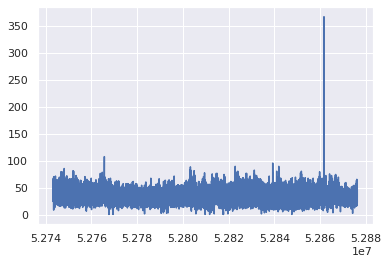

In [0]:
plt.plot(a.groupby(['LedgerIndex']).TimeStamp.count())

In [0]:
import numpy as np
import scipy.stats

def mean_confidence_interval(data, confidence=0.50):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [0]:
mean_confidence_interval(a.groupby(['LedgerIndex']).TimeStamp.count(),confidence=0.99)

(34.27101772402766, 34.211562494327254, 34.33047295372806)

In [0]:
a.groupby(['LedgerIndex']).count().sort_values(by=['TimeStamp'], ascending=False)[0:50]

,TimeStamp,Account,Destination,Fee,TxnSignature,AmountXRP,TransactionType,TransactionResult,AmountDEX,TakerGetsDEX,Memos,TakerPaysXRP,TakerGetsXRP
LedgerIndex,,,,,,,,,,,,,
52861756,367,367,0,367,367,0,367,367,0,367,367,367,0
52861776,192,192,0,192,192,0,192,192,0,19,192,17,20
52861760,153,153,1,153,153,1,153,153,0,134,153,133,18
52861752,150,150,1,150,150,1,150,150,0,149,150,149,0
52861761,147,147,1,147,147,1,147,147,0,127,147,127,17
52861754,145,145,1,145,145,1,145,145,0,131,145,131,10
52861774,140,140,1,140,140,1,140,140,0,16,140,16,20
52861762,139,139,1,139,138,1,139,139,0,126,139,126,12
52861773,137,137,3,137,136,3,137,137,0,17,137,17,19


In [0]:
df= a.groupby(['LedgerIndex']).count()

bins = pd.cut(df['TimeStamp'], [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550])

df.groupby(bins)['TimeStamp'].agg(['count', 'sum'])

,count,sum
TimeStamp,,
"(0, 50]",127925,4267240
"(50, 100]",5271,295920
"(100, 150]",10,1336
"(150, 200]",2,345
"(200, 250]",0,0
"(250, 300]",0,0
"(300, 350]",0,0
"(350, 400]",1,367
"(400, 450]",0,0


In [0]:
percentiles = [.25, .5, .75, .90, .95, .99]
a.groupby(['LedgerIndex']).count().TimeStamp.describe(percentiles = percentiles)

count    133209.000000
mean         34.271018
std           8.424295
min           1.000000
25%          29.000000
50%          33.000000
75%          39.000000
90%          45.000000
95%          49.000000
99%          58.000000
max         367.000000
Name: TimeStamp, dtype: float64

(array([9.3104e+04, 4.0006e+04, 8.7000e+01, 8.0000e+00, 2.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  1. ,  37.6,  74.2, 110.8, 147.4, 184. , 220.6, 257.2, 293.8,
        330.4, 367. ]),
 <a list of 10 Patch objects>)

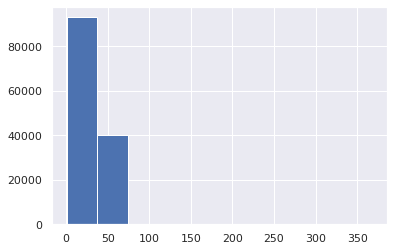

In [0]:
plt.hist(x=a.groupby(['LedgerIndex']).count().TimeStamp, bins=10)

In [0]:
a.groupby(['LedgerIndex']).count().sort_values(by=['Destination'], ascending=False)[0:20]

,TimeStamp,Account,Destination,Fee,TxnSignature,AmountXRP,TransactionType,TransactionResult,AmountDEX,TakerGetsDEX,Memos,TakerPaysXRP,TakerGetsXRP
LedgerIndex,,,,,,,,,,,,,
52815850,58,58,34,58,58,34,58,58,0,10,58,10,12
52822842,60,60,32,60,59,12,60,60,20,16,60,16,12
52823040,58,58,31,58,57,10,58,58,21,7,58,5,17
52793691,51,51,31,51,51,30,51,51,1,9,51,9,11
52823464,63,63,31,63,62,11,63,63,20,16,63,16,13
52831017,68,68,31,68,68,11,68,68,20,15,68,15,22
52832358,57,57,30,57,57,10,57,57,20,12,57,12,15
52829858,50,50,30,50,50,9,50,50,21,9,50,9,10
52832343,59,59,30,59,59,10,59,59,20,13,59,13,16


In [0]:
a.groupby(['Account']).count().sort_values(by=['Destination'], ascending=False)[0:50]

,TimeStamp,Destination,Fee,TxnSignature,AmountXRP,LedgerIndex,TransactionType,TransactionResult,AmountDEX,TakerGetsDEX,Memos,TakerPaysXRP,TakerGetsXRP
Account,,,,,,,,,,,,,
rUtCyL45mkqkSqvnoGMHJsqopmrAr1azDa,35902,35902,35902,35902,35902,35902,35902,35902,0,0,35902,0,0
rAPERVgXZavGgiGv6xBgtiZurirW2yAmY,25659,25659,25659,25659,25659,25659,25659,25659,0,0,25659,0,0
rJb5KsHsDHF1YS5B5DU6QCkH5NsPaKQTcy,13556,13556,13556,13556,13556,13556,13556,13556,0,0,13556,0,0
rLNaPoKeeBjZe2qs6x52yVPZpZ8td4dc6w,11787,11787,11787,11787,11787,11787,11787,11787,0,0,11787,0,0
rGrUgQDuBMuCVpLd5xz2qUFbxGUMwWJ1Sy,11504,11504,11504,11504,0,11504,11504,11504,11504,0,11504,0,0
rQ3YfCVkkRfjB3d83XuMaNgsg5VbRbp7GU,10755,10755,10755,10755,10755,10755,10755,10755,0,0,10755,0,0
rUSB76jBJ8EqmGGV3yuDDZJGJ9sFtJRuwu,10137,10137,10137,10137,0,10137,10137,10137,10137,0,10137,0,0
rN7rVCmvhgBHEFbnZXdbTHgwvzPjfmWJkt,9889,9889,9889,9889,9889,9889,9889,9889,0,0,9889,0,0
rJWbox8K4kndimMbqLGaxXf5FXzLk1RrNs,9828,9828,9828,9828,9828,9828,9828,9828,0,0,9828,0,0


In [0]:
a.groupby(['Destination']).count().sort_values(by=['Account'], ascending=False)[0:50]

In [0]:
a.groupby(['Account']).count().sort_values(by=['TimeStamp'], ascending=False)[0:50]

,TimeStamp,Destination,Fee,TxnSignature,AmountXRP,LedgerIndex,TransactionType,TransactionResult,AmountDEX,TakerGetsDEX,Memos,TakerPaysXRP,TakerGetsXRP
Account,,,,,,,,,,,,,
r4dgY6Mzob3NVq8CFYdEiPnXKboRScsXRu,498907,0,498907,498907,0,498907,498907,498907,0,498874,498907,498874,0
r4AZpDKVoBxVcYUJCWMcqZzyWsHTteC4ZE,497322,8,497322,497322,0,497322,497322,497322,8,0,497322,0,497048
rQ3fNyLjbvcDaPNS4EAJY8aT9zR3uGk17c,494458,3,494458,494458,0,494458,494458,494458,3,0,494458,0,494422
rh3VLyj1GbQjX7eA15BwUagEhSrPHmLkSR,492594,0,492594,492594,0,492594,492594,492594,0,492550,492594,492550,0
rs9tBKt96q9gwrePKPqimUuF7vErgMaker,235547,0,235547,235547,0,235547,235547,235547,0,90,235547,52,230749
rraUBy8yVKUJho1UiHPx9Pv8M8NPGPa5GL,143775,7,143775,143775,6,143775,143775,143775,1,143178,143775,143178,0
rUqqN1KKvLSknssUXrLX48vtnNdpvaqsZ7,127427,21,127427,127427,20,127427,127427,127427,1,125545,127427,125545,0
rH2k8SkwoWgwry9J89jgFP9NbSWu13jnsu,124231,0,124231,124231,0,124231,124231,124231,0,142,124231,71,121003
rhJYdAAiZPJpztnu13pHAATi4gsEi3Rf28,101845,3,101845,101845,3,101845,101845,101845,0,101842,101845,101842,0


############################################

Downloading other week's data

In [0]:
start_date='2020-01-08'
end_date='2020-01-14'

In [0]:
#Query and query_parameters
query1 = """
Select 
  TIMESTAMP(l.CloseTime) as `TimeStamp`,
  t.Account,t.Destination,t.Fee,t.TxnSignature,t.AmountXRP,t.LedgerIndex,t.TransactionType, TransactionResult, t.AmountDEX, TakerGetsDEX, Memos, TakerPaysXRP, TakerGetsXRP
FROM
  `xrpledgerdata.fullhistory.transactions`t
JOIN
  `xrpledgerdata.fullhistory.ledgers` l
  on t.LedgerIndex=l.LedgerIndex
where t.TransactionResult = "tesSUCCESS"

AND TIMESTAMP(l.CloseTime) >=TIMESTAMP(@start_date)
AND TIMESTAMP(l.CloseTime) <=TIMESTAMP(@end_date)




LIMIT 10000000000

"""


In [0]:
query_params1 = [
    bigquery.ScalarQueryParameter("start_date", "STRING", start_date),
    bigquery.ScalarQueryParameter("end_date", "STRING", end_date)
]

In [0]:
import timeit

start = timeit.default_timer()

b = gbq_query(query1, query_params1)

stop = timeit.default_timer()

print('Time: ', stop - start)  

Time:  1117.676420884


In [0]:
b

,TimeStamp,Account,Destination,Fee,TxnSignature,AmountXRP,LedgerIndex,TransactionType,TransactionResult,AmountDEX,TakerGetsDEX,Memos,TakerPaysXRP,TakerGetsXRP
0,2020-01-11 15:50:20+00:00,r4AZpDKVoBxVcYUJCWMcqZzyWsHTteC4ZE,None,12,3045022100AC7CD22B7131FB9A79707127C0C1AAC1E1E9...,NaN,52668028,OfferCreate,tesSUCCESS,None,None,[],NaN,2.567881e+09
1,2020-01-11 15:24:52+00:00,r4AZpDKVoBxVcYUJCWMcqZzyWsHTteC4ZE,None,12,304402206A64AE0C8445AD6B36F2E36407008EC901D51B...,NaN,52667637,OfferCreate,tesSUCCESS,None,None,[],NaN,1.206432e+10
2,2020-01-11 14:49:31+00:00,r4AZpDKVoBxVcYUJCWMcqZzyWsHTteC4ZE,None,12,3045022100E3142F269C3A12EAB12D0B2BE31A866E16B0...,NaN,52667082,OfferCreate,tesSUCCESS,None,None,[],NaN,4.896403e+09
3,2020-01-11 16:08:01+00:00,r4AZpDKVoBxVcYUJCWMcqZzyWsHTteC4ZE,None,12,304402204D6679CA791F2E19637EF50809762C5A9BFF25...,NaN,52668302,OfferCreate,tesSUCCESS,None,None,[],NaN,1.888176e+10
4,2020-01-11 15:23:30+00:00,r4AZpDKVoBxVcYUJCWMcqZzyWsHTteC4ZE,None,12,3044022018964713AE3C9E81B3A9CE1568BB7E7ECB3D1D...,NaN,52667615,OfferCreate,tesSUCCESS,None,None,[],NaN,1.199886e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5748414,2020-01-11 13:39:40+00:00,r4AZpDKVoBxVcYUJCWMcqZzyWsHTteC4ZE,None,12,3045022100FA859EADF341F147B09FDA6CFF3CF15571BD...,None,52665997,OfferCreate,tesSUCCESS,None,None,[],None,1.739477e+10
5748415,2020-01-11 13:52:11+00:00,r4AZpDKVoBxVcYUJCWMcqZzyWsHTteC4ZE,None,12,3045022100A886C19D076D1033F2EE2D99903BC2EEBC3E...,None,52666193,OfferCreate,tesSUCCESS,None,None,[],None,1.105043e+10
5748416,2020-01-11 13:04:00+00:00,r4AZpDKVoBxVcYUJCWMcqZzyWsHTteC4ZE,None,12,3045022100897295299F7A3158AE2B614932A5D1547A7B...,None,52665445,OfferCreate,tesSUCCESS,None,None,[],None,7.452365e+09
5748417,2020-01-11 13:54:32+00:00,r4AZpDKVoBxVcYUJCWMcqZzyWsHTteC4ZE,None,12,3045022100B8E566AD87416B2EECCF076E2CD47A3B8767...,None,52666230,OfferCreate,tesSUCCESS,None,None,[],None,4.251001e+09


In [0]:
b['TransactionType'].value_counts()

OfferCreate        4237459
Payment            1371182
OfferCancel          99058
TrustSet             36765
AccountSet            3872
EscrowFinish            27
SetRegularKey           27
EscrowCreate            19
SignerListSet            7
EnableAmendment          2
EscrowCancel             1
Name: TransactionType, dtype: int64

In [0]:
massimo=b.groupby(['LedgerIndex']).count().Account
massimo.max()

395

In [0]:
massimo.idxmax()

52631178

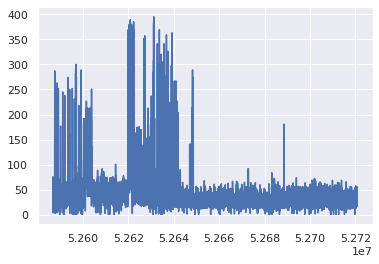

In [0]:
plt.plot(b.groupby(['LedgerIndex']).TimeStamp.count())

In [0]:
mean_confidence_interval(b.groupby(['LedgerIndex']).TimeStamp.count(),confidence=0.99)

(42.8887272347442, 42.61317330948034, 43.164281160008066)

In [0]:
df= b.groupby(['LedgerIndex']).count()

bins = pd.cut(df['TimeStamp'], [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550])

df.groupby(bins)['TimeStamp'].agg(['count', 'sum'])

,count,sum
TimeStamp,,
"(0, 50]",116667,3785410
"(50, 100]",10129,613283
"(100, 150]",2658,340188
"(150, 200]",2382,405190
"(200, 250]",731,164575
"(250, 300]",698,192894
"(300, 350]",726,232263
"(350, 400]",40,14616
"(400, 450]",0,0


(array([9.7132e+04, 2.8846e+04, 1.6340e+03, 2.4010e+03, 1.7720e+03,
        5.9900e+02, 5.2200e+02, 6.7800e+02, 4.1800e+02, 2.9000e+01]),
 array([  1. ,  40.4,  79.8, 119.2, 158.6, 198. , 237.4, 276.8, 316.2,
        355.6, 395. ]),
 <a list of 10 Patch objects>)

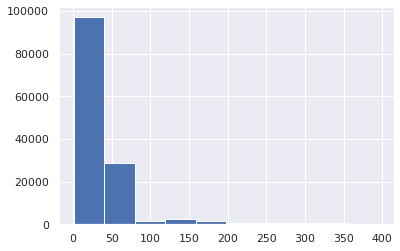

In [0]:
plt.hist(x=b.groupby(['LedgerIndex']).count().TimeStamp, bins=10)

In [0]:
percentiles = [.25, .5, .75, .90, .95, .99]
b.groupby(['LedgerIndex']).count().TimeStamp.describe(percentiles = percentiles)

count    134031.000000
mean         42.888727
std          39.163903
min           1.000000
25%          28.000000
50%          33.000000
75%          42.000000
90%          55.000000
95%         113.000000
99%         259.000000
max         395.000000
Name: TimeStamp, dtype: float64

In [0]:
b.groupby(['LedgerIndex']).count().sort_values(by=['TimeStamp'], ascending=False)[0:50]

,TimeStamp,Account,Destination,Fee,TxnSignature,AmountXRP,TransactionType,TransactionResult,AmountDEX,TakerGetsDEX,Memos,TakerPaysXRP,TakerGetsXRP
LedgerIndex,,,,,,,,,,,,,
52631178,395,395,308,395,395,2,395,395,306,24,395,24,49
52620844,389,389,359,389,388,2,389,389,357,15,389,15,15
52622309,385,385,325,385,385,2,385,385,323,28,385,28,32
52631110,383,383,333,383,383,1,383,383,332,22,383,22,26
52621240,380,380,362,380,380,0,380,380,362,8,380,8,8
52620828,380,380,344,380,380,2,380,380,342,16,380,16,13
52621481,379,379,341,379,379,2,379,379,339,20,379,20,18
52620223,379,379,329,379,379,2,379,379,327,23,379,23,27
52620476,374,374,321,374,374,0,374,374,321,25,374,25,28


In [0]:
b.groupby(['LedgerIndex']).count().sort_values(by=['Destination'], ascending=False)[0:20]

,TimeStamp,Account,Destination,Fee,TxnSignature,AmountXRP,TransactionType,TransactionResult,AmountDEX,TakerGetsDEX,Memos,TakerPaysXRP,TakerGetsXRP
LedgerIndex,,,,,,,,,,,,,
52621240,380,380,362,380,380,0,380,380,362,8,380,8,8
52633646,369,369,360,369,369,0,369,369,360,3,369,3,5
52620844,389,389,359,389,388,2,389,389,357,15,389,15,15
52620825,372,372,350,372,372,5,372,372,345,15,372,15,7
52620828,380,380,344,380,380,2,380,380,342,16,380,16,13
52639268,363,363,341,363,362,3,363,363,338,9,363,9,13
52621481,379,379,341,379,379,2,379,379,339,20,379,20,18
52635714,341,341,340,341,341,0,341,341,340,0,341,0,1
52620269,374,374,336,374,374,1,374,374,335,17,374,17,20


In [0]:
b.groupby(['Account']).count().sort_values(by=['Destination'], ascending=False)[0:50]

,TimeStamp,Destination,Fee,TxnSignature,AmountXRP,LedgerIndex,TransactionType,TransactionResult,AmountDEX,TakerGetsDEX,Memos,TakerPaysXRP,TakerGetsXRP
Account,,,,,,,,,,,,,
rUtCyL45mkqkSqvnoGMHJsqopmrAr1azDa,68986,68986,68986,68986,68986,68986,68986,68986,0,0,68986,0,0
rAPERVgXZavGgiGv6xBgtiZurirW2yAmY,18058,18058,18058,18058,18058,18058,18058,18058,0,0,18058,0,0
rJb5KsHsDHF1YS5B5DU6QCkH5NsPaKQTcy,9869,9869,9869,9869,9869,9869,9869,9869,0,0,9869,0,0
rLNaPoKeeBjZe2qs6x52yVPZpZ8td4dc6w,9108,9108,9108,9108,9108,9108,9108,9108,0,0,9108,0,0
rw2ciyaNshpHe7bCHo4bRWq6pqqynnWKQg,7864,7864,7864,7864,7864,7864,7864,7864,0,0,7864,0,0
rpJZ5WyotdphojwMLxCr2prhULvG3Voe3X,7851,7851,7851,7851,3437,7851,7851,7851,4414,0,7851,0,0
rU2mEJSLqBRkYLVTv55rFTgQajkLTnT6mA,7189,7189,7189,0,7189,7189,7189,7189,0,0,7189,0,0
rna3REBtXdafS8izdZBx86bQUsT96GFpNT,6045,6042,6045,6045,0,6045,6045,6045,6042,0,6045,0,0
rpKj9aiBUtC1TSfVDxYU9hAeodwxUcCjxy,5099,5087,5099,5099,0,5099,5099,5099,5087,0,5099,0,0


In [0]:
b.groupby(['Account']).count().sort_values(by=['TimeStamp'], ascending=False)[0:50]

,TimeStamp,Destination,Fee,TxnSignature,AmountXRP,LedgerIndex,TransactionType,TransactionResult,AmountDEX,TakerGetsDEX,Memos,TakerPaysXRP,TakerGetsXRP
Account,,,,,,,,,,,,,
rQ3fNyLjbvcDaPNS4EAJY8aT9zR3uGk17c,607540,1,607540,607540,0,607540,607540,607540,1,0,607540,0,605547
r4AZpDKVoBxVcYUJCWMcqZzyWsHTteC4ZE,605136,7,605136,605136,0,605136,605136,605136,7,0,605136,0,601830
rh3VLyj1GbQjX7eA15BwUagEhSrPHmLkSR,595042,0,595042,595042,0,595042,595042,595042,0,592784,595042,592784,0
r4dgY6Mzob3NVq8CFYdEiPnXKboRScsXRu,592379,4,592379,592379,4,592379,592379,592379,0,590563,592379,590563,0
rs9tBKt96q9gwrePKPqimUuF7vErgMaker,183225,0,183225,183225,0,183225,183225,183225,0,90,183225,48,176422
rnruxxLTbJUMNtFNBJ7X2xSiy1KE7ajUuH,128346,0,128346,128346,0,128346,128346,128346,0,0,128346,0,128285
rV2XRbZtsGwvpRptf3WaNyfgnuBpt64ca,127697,2,127697,127697,2,127697,127697,127697,0,127639,127697,127639,0
rHzKtpcB1KC1YuU4PBhk9m2abqrf2kZsfV,127440,0,127440,127440,0,127440,127440,127440,0,0,127440,0,127358
rwchA2b36zu2r6CJfEMzPLQ1cmciKFcw9t,127311,0,127311,127311,0,127311,127311,127311,0,127261,127311,127261,0


##############################################################
Downloading other week's data

In [0]:
start_date='2020-01-01'
end_date='2020-01-07'

In [0]:
#Query and query_parameters
query1 = """
Select 
  TIMESTAMP(l.CloseTime) as `TimeStamp`,
  t.Account,t.Destination,t.Fee,t.TxnSignature,t.AmountXRP,t.LedgerIndex,t.TransactionType, TransactionResult, t.AmountDEX, TakerGetsDEX, Memos, TakerPaysXRP, TakerGetsXRP
FROM
  `xrpledgerdata.fullhistory.transactions`t
JOIN
  `xrpledgerdata.fullhistory.ledgers` l
  on t.LedgerIndex=l.LedgerIndex
where t.TransactionResult = "tesSUCCESS"

AND TIMESTAMP(l.CloseTime) >=TIMESTAMP(@start_date)
AND TIMESTAMP(l.CloseTime) <=TIMESTAMP(@end_date)




LIMIT 10000000000

"""


In [0]:
query_params1 = [
    bigquery.ScalarQueryParameter("start_date", "STRING", start_date),
    bigquery.ScalarQueryParameter("end_date", "STRING", end_date)
]

In [0]:
import timeit

start = timeit.default_timer()

c = gbq_query(query1, query_params1)

stop = timeit.default_timer()

print('Time: ', stop - start) 

Time:  1331.4497959259998


In [0]:
c

,TimeStamp,Account,Destination,Fee,TxnSignature,AmountXRP,LedgerIndex,TransactionType,TransactionResult,AmountDEX,TakerGetsDEX,Memos,TakerPaysXRP,TakerGetsXRP
0,2020-01-04 19:43:30+00:00,rBW8YPFaQ8WhHUy3WyKJG3mfnTGUkuw86q,None,12,3044022013CAFA9B2FC3E72198A57A702CAFC61F776A7E...,NaN,52516977,OfferCreate,tesSUCCESS,None,"{'currency': 'CNY', 'issuer': 'rJ1adrpGS3xsnQM...",[],1.043466e+10,NaN
1,2020-01-04 19:35:00+00:00,rBW8YPFaQ8WhHUy3WyKJG3mfnTGUkuw86q,None,12,3044022039903EED457F1191DDB3E5D0C768EF6BA0052A...,NaN,52516847,OfferCreate,tesSUCCESS,None,"{'currency': 'CNY', 'issuer': 'rJ1adrpGS3xsnQM...",[],8.625643e+08,NaN
2,2020-01-04 19:55:21+00:00,rBW8YPFaQ8WhHUy3WyKJG3mfnTGUkuw86q,None,12,3045022100C7947AFBF3FC246E1CB189EFA72433DA0076...,NaN,52517159,OfferCreate,tesSUCCESS,None,"{'currency': 'CNY', 'issuer': 'rJ1adrpGS3xsnQM...",[],5.788395e+09,NaN
3,2020-01-04 19:04:00+00:00,rBW8YPFaQ8WhHUy3WyKJG3mfnTGUkuw86q,None,12,3045022100DA71EF495755E9157AB29D79ED182078172D...,NaN,52516375,OfferCreate,tesSUCCESS,None,"{'currency': 'CNY', 'issuer': 'rJ1adrpGS3xsnQM...",[],7.446823e+09,NaN
4,2020-01-04 18:57:52+00:00,rBW8YPFaQ8WhHUy3WyKJG3mfnTGUkuw86q,None,12,3044022009D779EA426E62A6D0AB1F599337C4D43129F0...,NaN,52516282,OfferCreate,tesSUCCESS,None,"{'currency': 'CNY', 'issuer': 'rJ1adrpGS3xsnQM...",[],3.421555e+08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7063525,2020-01-04 19:01:50+00:00,rBW8YPFaQ8WhHUy3WyKJG3mfnTGUkuw86q,None,12,3044022004A761E793995BEAAAFA7D27FD48EA8E5B4DA0...,None,52516342,OfferCreate,tesSUCCESS,None,"{'currency': 'CNY', 'issuer': 'rJ1adrpGS3xsnQM...",[],1.149203e+09,NaN
7063526,2020-01-04 19:20:40+00:00,rBW8YPFaQ8WhHUy3WyKJG3mfnTGUkuw86q,None,12,30450221008EF2DBA52401DA2A16EC12A391B62E3BD87C...,None,52516629,OfferCreate,tesSUCCESS,None,"{'currency': 'CNY', 'issuer': 'rJ1adrpGS3xsnQM...",[],1.152297e+10,NaN
7063527,2020-01-04 19:22:50+00:00,rBW8YPFaQ8WhHUy3WyKJG3mfnTGUkuw86q,None,12,304402201D402CF87BD31FEBC1BBFD53052AC8844B142A...,None,52516661,OfferCreate,tesSUCCESS,None,"{'currency': 'CNY', 'issuer': 'rJ1adrpGS3xsnQM...",[],1.045145e+10,NaN
7063528,2020-01-04 19:27:20+00:00,rBW8YPFaQ8WhHUy3WyKJG3mfnTGUkuw86q,None,12,30440220737B26F4454E79D85E89483323E0FD1F8FBF02...,None,52516730,OfferCreate,tesSUCCESS,None,"{'currency': 'CNY', 'issuer': 'rJ1adrpGS3xsnQM...",[],1.874564e+10,NaN


In [0]:
c['TransactionType'].value_counts()

OfferCreate            5345795
Payment                1615906
OfferCancel              97291
AccountSet                3977
TrustSet                   367
EscrowCreate               148
EscrowFinish                15
PaymentChannelClaim         14
SetRegularKey               13
EnableAmendment              2
SignerListSet                2
Name: TransactionType, dtype: int64

In [0]:
massimo=c.groupby(['LedgerIndex']).count().Account
massimo.max()

534

In [0]:
massimo.idxmax()

52562705

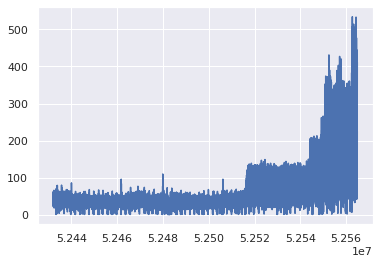

In [0]:
plt.plot(c.groupby(['LedgerIndex']).TimeStamp.count())

In [0]:
mean_confidence_interval(c.groupby(['LedgerIndex']).TimeStamp.count(),confidence=0.99)

(53.20726149674212, 52.912781002808735, 53.501741990675505)

In [0]:
df= c.groupby(['LedgerIndex']).count()

bins = pd.cut(df['TimeStamp'], [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550])

df.groupby(bins)['TimeStamp'].agg(['count', 'sum'])

,count,sum
TimeStamp,,
"(0, 50]",87453,3156927
"(50, 100]",37324,2429303
"(100, 150]",3775,445444
"(150, 200]",1229,213599
"(200, 250]",949,215156
"(250, 300]",1283,353329
"(300, 350]",596,190671
"(350, 400]",82,30423
"(400, 450]",39,16529


(array([9.3698e+04, 3.2122e+04, 3.0060e+03, 1.1980e+03, 1.1360e+03,
        1.1890e+03, 3.1200e+02, 5.4000e+01, 2.7000e+01, 1.3000e+01]),
 array([  1. ,  54.3, 107.6, 160.9, 214.2, 267.5, 320.8, 374.1, 427.4,
        480.7, 534. ]),
 <a list of 10 Patch objects>)

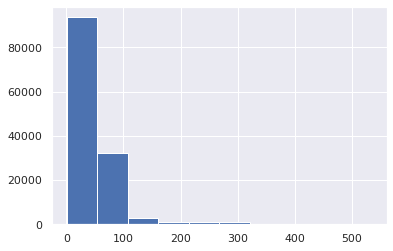

In [0]:
plt.hist(x=c.groupby(['LedgerIndex']).count().TimeStamp, bins=10)

In [0]:
percentiles = [.25, .5, .75, .90, .95, .99]
c.groupby(['LedgerIndex']).count().TimeStamp.describe(percentiles = percentiles)

count    132755.000000
mean         53.207261
std          41.654186
min           1.000000
25%          35.000000
50%          42.000000
75%          58.000000
90%          79.000000
95%         110.000000
99%         277.000000
max         534.000000
Name: TimeStamp, dtype: float64

In [0]:
c.groupby(['LedgerIndex']).count().sort_values(by=['TimeStamp'], ascending=False)[0:50]

,TimeStamp,Account,Destination,Fee,TxnSignature,AmountXRP,TransactionType,TransactionResult,AmountDEX,TakerGetsDEX,Memos,TakerPaysXRP,TakerGetsXRP
LedgerIndex,,,,,,,,,,,,,
52562705,534,534,480,534,534,0,534,534,480,29,534,28,24
52564314,533,533,464,533,533,0,533,533,464,28,533,28,39
52563267,514,514,456,514,514,3,514,514,453,28,514,28,30
52562675,507,507,453,507,507,0,507,507,453,27,507,27,25
52563950,506,506,441,506,506,1,506,506,440,32,506,32,29
52564117,498,498,437,498,498,1,498,498,436,25,498,25,30
52564284,497,497,449,497,495,5,497,497,444,24,497,24,24
52563965,496,496,437,496,495,3,496,496,434,29,496,29,26
52562477,490,490,433,490,490,0,490,490,433,30,490,29,27


In [0]:
c.groupby(['LedgerIndex']).count().sort_values(by=['Destination'], ascending=False)[0:20]

,TimeStamp,Account,Destination,Fee,TxnSignature,AmountXRP,TransactionType,TransactionResult,AmountDEX,TakerGetsDEX,Memos,TakerPaysXRP,TakerGetsXRP
LedgerIndex,,,,,,,,,,,,,
52562705,534,534,480,534,534,0,534,534,480,29,534,28,24
52564314,533,533,464,533,533,0,533,533,464,28,533,28,39
52563267,514,514,456,514,514,3,514,514,453,28,514,28,30
52562675,507,507,453,507,507,0,507,507,453,27,507,27,25
52564284,497,497,449,497,495,5,497,497,444,24,497,24,24
52563950,506,506,441,506,506,1,506,506,440,32,506,32,29
52564117,498,498,437,498,498,1,498,498,436,25,498,25,30
52563965,496,496,437,496,495,3,496,496,434,29,496,29,26
52564299,476,476,435,476,476,0,476,476,435,20,476,20,21


In [0]:
c.groupby(['Account']).count().sort_values(by=['Destination'], ascending=False)[0:50]

,TimeStamp,Destination,Fee,TxnSignature,AmountXRP,LedgerIndex,TransactionType,TransactionResult,AmountDEX,TakerGetsDEX,Memos,TakerPaysXRP,TakerGetsXRP
Account,,,,,,,,,,,,,
rUtCyL45mkqkSqvnoGMHJsqopmrAr1azDa,28692,28692,28692,28692,28692,28692,28692,28692,0,0,28692,0,0
rAPERVgXZavGgiGv6xBgtiZurirW2yAmY,16905,16905,16905,16905,16905,16905,16905,16905,0,0,16905,0,0
rLNaPoKeeBjZe2qs6x52yVPZpZ8td4dc6w,9433,9433,9433,9433,9433,9433,9433,9433,0,0,9433,0,0
rJb5KsHsDHF1YS5B5DU6QCkH5NsPaKQTcy,8426,8426,8426,8426,8426,8426,8426,8426,0,0,8426,0,0
r4dqfEekfLubhTeShmcs6ToMbG6rjB8Bwy,7454,7454,7454,7454,0,7454,7454,7454,7454,0,7454,0,0
rU2mEJSLqBRkYLVTv55rFTgQajkLTnT6mA,7325,7325,7325,0,7325,7325,7325,7325,0,0,7325,0,0
raBmhBNmYFGe5hJ5Gez2MbpNspewctCAGv,7366,7185,7366,7366,7176,7366,7366,7366,9,122,7366,122,48
rLxw6GNiyAcb8KnVQx3u91XhJd9ScikhMx,6508,6508,6508,6508,0,6508,6508,6508,6508,0,6508,0,0
rUoVZfCo3rGTtSPqi3cbUHip7D5LCuW4bC,6307,6307,6307,6307,0,6307,6307,6307,6307,0,6307,0,0


In [0]:
c.groupby(['Account']).count().sort_values(by=['TimeStamp'], ascending=False)[0:50]

,TimeStamp,Destination,Fee,TxnSignature,AmountXRP,LedgerIndex,TransactionType,TransactionResult,AmountDEX,TakerGetsDEX,Memos,TakerPaysXRP,TakerGetsXRP
Account,,,,,,,,,,,,,
rQ3fNyLjbvcDaPNS4EAJY8aT9zR3uGk17c,821670,0,821670,821670,0,821670,821670,821670,0,0,821670,0,818368
r4AZpDKVoBxVcYUJCWMcqZzyWsHTteC4ZE,816369,0,816369,816369,0,816369,816369,816369,0,0,816369,0,813099
rh3VLyj1GbQjX7eA15BwUagEhSrPHmLkSR,804880,0,804880,804880,0,804880,804880,804880,0,801567,804880,801567,0
r4dgY6Mzob3NVq8CFYdEiPnXKboRScsXRu,800116,6,800116,800116,6,800116,800116,800116,0,796468,800116,796468,0
rV2XRbZtsGwvpRptf3WaNyfgnuBpt64ca,173661,14,173661,173661,13,173661,173661,173661,1,173542,173661,173542,0
rUTEn2jLLv4ESmrUqQmhZfEfDN3LorhgvZ,173223,0,173223,173223,0,173223,173223,173223,0,0,173223,0,173144
rwchA2b36zu2r6CJfEMzPLQ1cmciKFcw9t,173108,0,173108,173108,0,173108,173108,173108,0,173000,173108,173000,0
rnruxxLTbJUMNtFNBJ7X2xSiy1KE7ajUuH,172941,0,172941,172941,0,172941,172941,172941,0,0,172941,0,172807
rJumr5e1HwiuV543H7bqixhtFreChWTaHH,172814,0,172814,172814,0,172814,172814,172814,0,0,172814,0,172716


##############################################################
Downloading other week's data

In [0]:
start_date='2019-12-25'
end_date='2019-12-31'

In [0]:
#Query and query_parameters
query1 = """
Select 
  TIMESTAMP(l.CloseTime) as `TimeStamp`,
  t.Account,t.Destination,t.Fee,t.TxnSignature,t.AmountXRP,t.LedgerIndex,t.TransactionType, TransactionResult, t.AmountDEX, TakerGetsDEX, Memos, TakerPaysXRP, TakerGetsXRP
FROM
  `xrpledgerdata.fullhistory.transactions`t
JOIN
  `xrpledgerdata.fullhistory.ledgers` l
  on t.LedgerIndex=l.LedgerIndex
where t.TransactionResult = "tesSUCCESS"

AND TIMESTAMP(l.CloseTime) >=TIMESTAMP(@start_date)
AND TIMESTAMP(l.CloseTime) <=TIMESTAMP(@end_date)




LIMIT 10000000000

"""

In [0]:
query_params1 = [
    bigquery.ScalarQueryParameter("start_date", "STRING", start_date),
    bigquery.ScalarQueryParameter("end_date", "STRING", end_date)
]

In [0]:
import timeit

start = timeit.default_timer()

d = gbq_query(query1, query_params1)

stop = timeit.default_timer()

print('Time: ', stop - start)  

Time:  1157.851576997


In [0]:
d

,TimeStamp,Account,Destination,Fee,TxnSignature,AmountXRP,LedgerIndex,TransactionType,TransactionResult,AmountDEX,TakerGetsDEX,Memos,TakerPaysXRP,TakerGetsXRP
0,2019-12-29 22:46:00+00:00,rJumr5e1HwiuV543H7bqixhtFreChWTaHH,None,12,30450221009F99FE50BB3728C05CECE6505883CC02FE84...,NaN,52386739,OfferCreate,tesSUCCESS,None,None,[],NaN,1.881089e+10
1,2019-12-29 22:48:40+00:00,rJumr5e1HwiuV543H7bqixhtFreChWTaHH,None,12,3044022059B41CD4BE5D5C43D7CE96087098F83348F8D3...,NaN,52386780,OfferCreate,tesSUCCESS,None,None,[],NaN,9.381628e+09
2,2019-12-29 22:06:31+00:00,rJumr5e1HwiuV543H7bqixhtFreChWTaHH,None,12,3045022100EE5B6717B59AA9F2402867D49613C2ECA543...,NaN,52386136,OfferCreate,tesSUCCESS,None,None,[],NaN,9.742878e+09
3,2019-12-29 22:51:51+00:00,rJumr5e1HwiuV543H7bqixhtFreChWTaHH,None,12,304502210095E0BB0116F2DFD3DC77B757A5DBC8A6F9AE...,NaN,52386830,OfferCreate,tesSUCCESS,None,None,[],NaN,1.719756e+10
4,2019-12-29 22:10:30+00:00,rJumr5e1HwiuV543H7bqixhtFreChWTaHH,None,12,304402206E58057E4A1C4FC47BB779DA5D44BA6EFEBE39...,NaN,52386197,OfferCreate,tesSUCCESS,None,None,[],NaN,1.274287e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6173794,2019-12-29 02:42:21+00:00,r4pgX8eBsWBfg7es8P4B6eMLSkTaoyTXCa,None,12,3045022100C799CC371B2A70C3CBC2CC11FDCEE14552B5...,None,52368329,OfferCreate,tesSUCCESS,None,None,[],NaN,7.754995e+07
6173795,2019-12-29 05:17:20+00:00,r4pgX8eBsWBfg7es8P4B6eMLSkTaoyTXCa,None,12,3045022100A3012777BC7C660615E328AFB632B9F7DE8A...,None,52370696,OfferCreate,tesSUCCESS,None,None,[],NaN,7.754947e+07
6173796,2019-12-29 00:20:20+00:00,rMfZeiSrjHujvCVJX5J2dvGeuDtP7a4aN1,None,150,3045022100D866BB8D2BF8A1BCFEAA8F859A9BBE1B9569...,None,52366161,OfferCreate,tesSUCCESS,None,None,[],NaN,3.332849e+07
6173797,2019-12-29 00:33:30+00:00,rMfZeiSrjHujvCVJX5J2dvGeuDtP7a4aN1,None,150,3044022049A04A26E2EFD2D6757F92B1E130527C36CA66...,None,52366361,OfferCreate,tesSUCCESS,None,None,[],NaN,3.332845e+07


In [0]:
d['TransactionType'].value_counts()

OfferCreate            4965469
Payment                1118116
OfferCancel              86191
AccountSet                3643
TrustSet                   334
SetRegularKey               21
EscrowCreate                11
EscrowFinish                 8
SignerListSet                4
PaymentChannelClaim          2
Name: TransactionType, dtype: int64

In [0]:
massimo=d.groupby(['LedgerIndex']).count().Account
print(massimo.max(), massimo.idxmax())

948 52285408


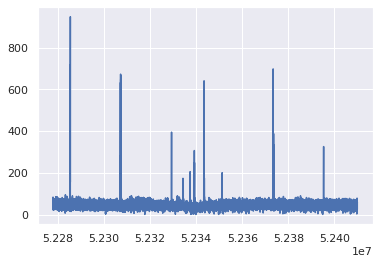

In [0]:
plt.plot(d.groupby(['LedgerIndex']).TimeStamp.count())

In [0]:
mean_confidence_interval(d.groupby(['LedgerIndex']).TimeStamp.count(),confidence=0.99)

(46.75314083195129, 46.58884508140273, 46.91743658249985)

In [0]:
df= d.groupby(['LedgerIndex']).count()

bins = pd.cut(df['TimeStamp'], [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 700, 1000])

df.groupby(bins)['TimeStamp'].agg(['count', 'sum'])

,count,sum
TimeStamp,,
"(0, 50]",93377,3818406
"(50, 100]",38013,2166703
"(100, 150]",153,19191
"(150, 200]",153,26529
"(200, 250]",108,24069
"(250, 300]",39,10528
"(300, 350]",31,10002
"(350, 400]",17,6417
"(400, 450]",14,5938


(array([8.3569e+04, 4.7806e+04, 1.4600e+02, 1.5400e+02, 1.0900e+02,
        5.4000e+01, 2.8000e+01, 1.7000e+01, 1.6000e+01, 1.0000e+01,
        1.4000e+01, 3.3000e+01, 4.6000e+01, 3.8000e+01, 8.0000e+00,
        1.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  1.  ,  48.35,  95.7 , 143.05, 190.4 , 237.75, 285.1 , 332.45,
        379.8 , 427.15, 474.5 , 521.85, 569.2 , 616.55, 663.9 , 711.25,
        758.6 , 805.95, 853.3 , 900.65, 948.  ]),
 <a list of 20 Patch objects>)

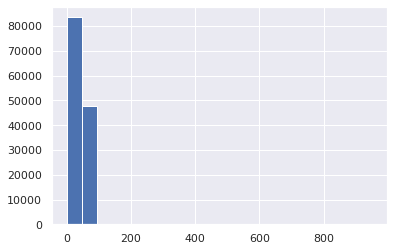

In [0]:
plt.hist(x=d.groupby(['LedgerIndex']).count().TimeStamp, bins=20)

In [0]:
percentiles = [.25, .5, .75, .90, .95, .99]
d.groupby(['LedgerIndex']).count().TimeStamp.describe(percentiles = percentiles)

count    132051.000000
mean         46.753141
std          23.177886
min           1.000000
25%          39.000000
50%          45.000000
75%          52.000000
90%          58.000000
95%          62.000000
99%          73.000000
max         948.000000
Name: TimeStamp, dtype: float64

In [0]:
d.groupby(['LedgerIndex']).count().sort_values(by=['TimeStamp'], ascending=False)[0:50]

,TimeStamp,Account,Destination,Fee,TxnSignature,AmountXRP,TransactionType,TransactionResult,AmountDEX,TakerGetsDEX,Memos,TakerPaysXRP,TakerGetsXRP
LedgerIndex,,,,,,,,,,,,,
52285408,948,948,8,948,948,0,948,948,8,927,948,927,11
52285394,803,803,7,803,803,1,803,803,6,785,803,785,10
52285357,717,717,13,717,717,2,717,717,11,697,717,697,7
52373395,698,698,4,698,698,0,698,698,4,660,698,660,32
52285314,681,681,23,681,680,1,681,681,22,637,681,637,20
52307208,673,673,13,673,673,0,673,673,13,634,673,634,25
52307191,667,667,12,667,667,0,667,667,12,626,667,626,25
52285245,665,665,21,665,665,1,665,665,20,623,665,623,21
52307285,665,665,10,665,665,0,665,665,10,630,665,630,25


In [0]:
d.groupby(['LedgerIndex']).count().sort_values(by=['Destination'], ascending=False)[0:20]

,TimeStamp,Account,Destination,Fee,TxnSignature,AmountXRP,TransactionType,TransactionResult,AmountDEX,TakerGetsDEX,Memos,TakerPaysXRP,TakerGetsXRP
LedgerIndex,,,,,,,,,,,,,
52349816,72,72,47,72,72,31,72,72,16,14,72,14,11
52282323,64,64,40,64,64,0,64,64,40,11,64,11,13
52285329,115,115,38,115,115,1,115,115,37,61,115,61,16
52278837,77,77,36,77,77,2,77,77,34,22,77,22,19
52297728,53,53,35,53,53,1,53,53,34,14,53,14,4
52280551,70,70,35,70,70,0,70,70,35,21,70,21,14
52281983,67,67,35,67,64,4,67,67,31,22,67,22,10
52281522,72,72,35,72,70,3,72,72,32,20,72,20,17
52319829,83,83,35,83,83,1,83,83,34,21,83,21,27


In [0]:
d.groupby(['Account']).count().sort_values(by=['Destination'], ascending=False)[0:50]

,TimeStamp,Destination,Fee,TxnSignature,AmountXRP,LedgerIndex,TransactionType,TransactionResult,AmountDEX,TakerGetsDEX,Memos,TakerPaysXRP,TakerGetsXRP
Account,,,,,,,,,,,,,
rUtCyL45mkqkSqvnoGMHJsqopmrAr1azDa,19847,19847,19847,19847,19847,19847,19847,19847,0,0,19847,0,0
rAPERVgXZavGgiGv6xBgtiZurirW2yAmY,19158,19158,19158,19158,19158,19158,19158,19158,0,0,19158,0,0
rLNaPoKeeBjZe2qs6x52yVPZpZ8td4dc6w,9732,9732,9732,9732,9732,9732,9732,9732,0,0,9732,0,0
rwpWJPK9i5pQc1pvw3TBLLXZk3JxaTADDS,8211,8211,8211,8211,0,8211,8211,8211,8211,0,8211,0,0
rGMUV8fg1NxggLP2eVFrDpMrMYvkqgqYh1,8203,8203,8203,8203,0,8203,8203,8203,8203,0,8203,0,0
rU7jCQDPD9S5V7TMzQRgDAs5DHqxe6yYWU,8088,8088,8088,8088,0,8088,8088,8088,8088,0,8088,0,0
rLqtea2mjTe8ehY9uMuBSHNkj1Fq9nXocs,8033,8033,8033,8033,0,8033,8033,8033,8033,0,8033,0,0
rJb5KsHsDHF1YS5B5DU6QCkH5NsPaKQTcy,7951,7951,7951,7951,7951,7951,7951,7951,0,0,7951,0,0
rU2mEJSLqBRkYLVTv55rFTgQajkLTnT6mA,7924,7924,7924,0,7924,7924,7924,7924,0,0,7924,0,0


In [0]:
d.groupby(['Account']).count().sort_values(by=['TimeStamp'], ascending=False)[0:50]

,TimeStamp,Destination,Fee,TxnSignature,AmountXRP,LedgerIndex,TransactionType,TransactionResult,AmountDEX,TakerGetsDEX,Memos,TakerPaysXRP,TakerGetsXRP
Account,,,,,,,,,,,,,
rQ3fNyLjbvcDaPNS4EAJY8aT9zR3uGk17c,749306,1,749306,749306,0,749306,749306,749306,1,0,749306,0,743815
rh3VLyj1GbQjX7eA15BwUagEhSrPHmLkSR,719925,0,719925,719925,0,719925,719925,719925,0,713871,719925,713871,0
r4dgY6Mzob3NVq8CFYdEiPnXKboRScsXRu,708678,1,708678,708678,1,708678,708678,708678,0,703130,708678,703130,0
r4AZpDKVoBxVcYUJCWMcqZzyWsHTteC4ZE,541229,1,541229,541229,0,541229,541229,541229,1,0,541229,0,536773
rGgzYfDzgY1bQuiW2XHFhKZNEx9h8ggKoR,165568,2,165568,165568,2,165568,165568,165568,0,165560,165568,165560,4
rDzTZxa7NwD9vmNf5dvTbW4FQDNSRsfPv6,165438,0,165438,165438,0,165438,165438,165438,0,165188,165438,165188,0
rHbtcv6GanWzbm4NMQGuj19BjL27YBiQNg,165347,1,165347,165347,1,165347,165347,165347,0,0,165347,0,165124
rhJYdAAiZPJpztnu13pHAATi4gsEi3Rf28,164978,1,164978,164978,0,164978,164978,164978,1,164725,164978,164725,0
rV2XRbZtsGwvpRptf3WaNyfgnuBpt64ca,164949,13,164949,164949,13,164949,164949,164949,0,164774,164949,164774,0


Additional stuff

In [0]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
a.to_csv(r'data.csv')

In [0]:
from os import getcwd
print(getcwd())

/content


In [0]:
e = read_csv("gdrive/Il mio Drive/Colab Notebooks/data.csv')

In [0]:
query1= """
WITH
  ledgersByPeriod AS ( # Get first and last ledger index per month
  SELECT
    MIN(ledgers.LedgerIndex) AS firstLedgerIndex,
    MAX(ledgers.LedgerIndex) AS lastLedgerIndex,
    DATETIME_TRUNC(CloseTime,
      MONTH) AS Period
  FROM
    xrpledgerdata.fullhistory.ledgers
  GROUP BY
    Period),
  transactionsStepOne AS ( # Get all wallets receiving XRP
  SELECT
    Period,
    Destination AS Wallet,
    firstLedgerIndex,
    lastLedgerIndex,
    COUNT(*) AS ReceivedCount,
    SUM(AmountXRP) / 1000000 AS ReceivedAmount
  FROM
    ledgersByPeriod AS ledgers,
    xrpledgerdata.fullhistory.transactions AS transactions
  WHERE
    transactions.LedgerIndex >= ledgers.firstLedgerIndex
    AND transactions.LedgerIndex <= ledgers.lastLedgerIndex
    AND TransactionType = "Payment"
    AND TransactionResult = "tesSUCCESS"
    AND AmountXRP IS NOT NULL
    AND Account != Destination
    AND SendMaxDEX.value IS NULL # Excludes a few payments that makes results unreliable
  GROUP BY
    Period,
    firstLedgerIndex,
    lastLedgerIndex,
    Destination),
  transactionsStepTwo AS ( # Get all wallets sending XRP
  SELECT
    Period,
    Account AS Wallet,
    firstLedgerIndex,
    lastLedgerIndex,
    COUNT(*) AS SentCount,
    SUM(AmountXRP) / 1000000 AS SentAmount,
    SUM(Fee) / 1000000 AS BurnedAmount
  FROM
    ledgersByPeriod AS ledgers,
    xrpledgerdata.fullhistory.transactions AS transactions
  WHERE
    transactions.LedgerIndex >= ledgers.firstLedgerIndex
    AND transactions.LedgerIndex <= ledgers.lastLedgerIndex
    AND TransactionType = "Payment"
    AND TransactionResult = "tesSUCCESS"
    AND AmountXRP IS NOT NULL
    AND Account != Destination
    AND SendMaxDEX.value IS NULL # Excludes a few payments that makes results unreliable
  GROUP BY
    Period,
    firstLedgerIndex,
    lastLedgerIndex,
    Account),
  transactionsStepThree AS ( # Join the sending and receiving wallets and add data
  SELECT
    Wallet,
    Period,
    IFNULL(ReceivedCount,0) AS ReceivedCount,
    IFNULL(ReceivedAmount,0) AS ReceivedAmount,
    IFNULL(SentCount,0) AS SentCount,
    IFNULL(SentAmount,0) AS SentAmount,
    IFNULL(BurnedAmount,0) AS BurnedAmount,
    IFNULL(ReceivedAmount,0) - IFNULL(SentAmount,0) AS Balance,
    IFNULL(ReceivedCount,0) + IFNULL(SentCount,0) AS TotalCount,
    MAX(IFNULL(SentCount,0)) OVER (PARTITION BY Period) AS MaxSentCount,
    MIN(IFNULL(SentCount,0)) OVER (PARTITION BY Period) AS MinSentCount,
    MAX(IFNULL(ReceivedCount,0)) OVER (PARTITION BY Period) AS MaxReceivedCount,
    MIN(IFNULL(ReceivedCount,0)) OVER (PARTITION BY Period) AS MinReceivedCount,
    MAX(IFNULL(ReceivedCount,0) + IFNULL(SentCount,0)) OVER (PARTITION BY Period) AS MaxTotalCount,
    MIN(IFNULL(ReceivedCount,0) + IFNULL(SentCount,0)) OVER (PARTITION BY Period) AS MinTotalCount,
    MAX(IFNULL(ReceivedAmount,0) - IFNULL(SentAmount,0)) OVER (PARTITION BY Period) AS MaxBalance,
    MIN(IFNULL(ReceivedAmount,0) - IFNULL(SentAmount,0)) OVER (PARTITION BY Period) AS MinBalance
  FROM
    transactionsStepOne
  FULL OUTER JOIN
    transactionsStepTwo
  USING
    (Wallet,Period)),
  transactionsStepFour AS ( # Add more data
  SELECT
    *,
    IF(
      Balance / IF(SentAmount != 0,SentAmount,1) > 1,
      1,
      IF(
        Balance / IF(SentAmount != 0,SentAmount,1) < -1,
        -1,
        Balance / IF(SentAmount != 0,SentAmount,1)
      )
    ) AS AccumulationDistributionBias,
    # Normalized between 0 and 1
    IFNULL(NULLIF((SentCount - MinSentCount),0) / (MaxSentCount - MinSentCount),0) AS SentActivityIndex,
    IFNULL(NULLIF((ReceivedCount - MinReceivedCount),0) / (MaxReceivedCount - MinReceivedCount),0) AS ReceivedActivityIndex,
    IFNULL(NULLIF((TotalCount - MinTotalCount),0) / (MaxTotalCount - MinTotalCount),0) AS TotalActivityIndex,
    IFNULL(NULLIF((Balance - MinBalance),0) / (MaxBalance - MinBalance),0) AS BalanceIndex
  FROM
    transactionsStepThree)
SELECT # Group by period and sum/avg the fields
  Period,
  COUNT(*) AS Wallets,
  SUM(ReceivedCount) AS Transactions,
  SUM(ReceivedAmount) AS Amount,
  SUM(BurnedAmount) AS Burned,
  AVG(AccumulationDistributionBias) AS AverageAccumulationDistributionBias,
  AVG(SentActivityIndex) AS AverageSentActivityIndex,
  AVG(ReceivedActivityIndex) AS AverageReceivedActivityIndex,
  AVG(TotalActivityIndex) AS AverageTotalActivityIndex,
  AVG(BalanceIndex) AS AverageBalanceIndex,
  SUM(IF(Balance > 0,Balance,0)) AS Circulating,
  IF(SUM(ReceivedAmount) = 0 OR SUM(IF(Balance > 0,Balance,0)) = 0,
    0,
    SUM(ReceivedAmount) / SUM(IF(Balance > 0,Balance,0))) AS ReuseRatio,
  AVG(Balance) AS AverageBalance
FROM
  transactionsStepFour
# WHERE
#   SentActivityIndex < 0.2 AND ReceivedActivityIndex < 0.2 AND TotalActivityIndex < 0.2 AND BalanceIndex < 0.8 # Filter the results
GROUP BY
  Period
ORDER BY
  Period ASC

"""